In [158]:
import numpy as np
import pandas as pd
import datetime

In [2]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [3]:
# datasource: http://thinknook.com/wp-content/uploads/2012/09/Sentiment-Analysis-Dataset.zip

In [4]:
df = pd.read_csv("emotion-text-dataset/Sentiment Analysis Dataset.csv", error_bad_lines=False)
df

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_36165/1905294640.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("emotion-text-dataset/Sentiment Analysis Dataset.csv", error_bad_lines=False)
Skipping line 8836: expected 4 fields, saw 5

Skipping line 535882: expected 4 fields, saw 7



,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [5]:
# # remove neutral sentiment
# df = df[df["Sentiment"] != 0]

# # convert negative sentiment to 0
# df["category"] = df["category"].replace(-1, 0)

In [6]:
df["Sentiment"].value_counts()

1    790177
0    788435
Name: Sentiment, dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [8]:
df["Sentiment"].value_counts()

1    790177
0    788435
Name: Sentiment, dtype: int64

In [9]:
df[df["Sentiment"] == 0].sample()["SentimentText"].iloc[0]

'5 minutes away from a climb and the thunder rolled in...and stayed for the rest of the day. I just wanted to climb '

In [10]:
df[df["Sentiment"] == 1].sample()["SentimentText"].iloc[0]

'Home from rehearsal, which went really well, got my new phone exchanged for one that will work right &amp; watching TV. '

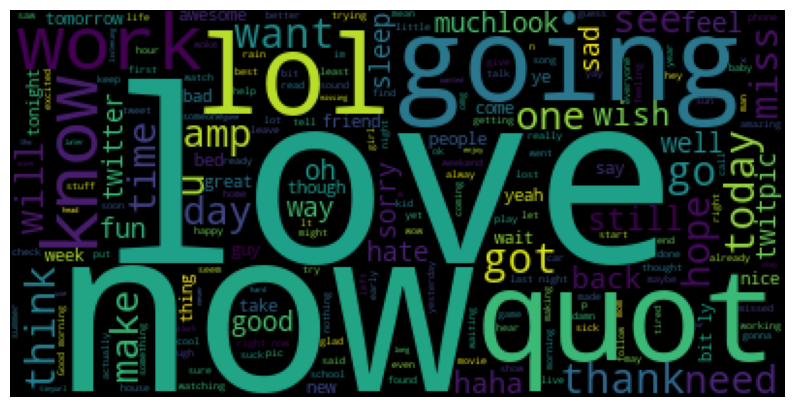

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


all_tweets = ' '.join(df['SentimentText'])

# Generate WordCloud
wordcloud = WordCloud().generate(all_tweets)

# Plot WordCloud                    
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
df.drop(['ItemID', 'SentimentSource'], axis=1, inplace=True)

In [13]:
df

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...
...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!
1578608,1,"Zzzzzzz, sleep well people"
1578609,0,ZzzZzZzzzZ... wait no I have homework.
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?"


Doing text cleaning on our own

In [14]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
detokenizer = TreebankWordDetokenizer()

In [15]:
def clean_text(text):
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = word_tokenize(text)
    # remove stopwords
    text = [token for token in text if token not in stop_words]
    # lemmatizer
    text = [lemmatizer.lemmatize(token) for token in text]

    # return detokenizer.detokenize(text).strip()
    return text

In [16]:
df["Clean_Text"] = df["SentimentText"].progress_apply(clean_text)

  0%|          | 0/1578612 [00:00<?, ?it/s]

Remove text that are too short

In [17]:
df.shape

(1578612, 3)

In [18]:
df[df["Clean_Text"].apply(len) > 3].shape

(1394976, 3)

In [19]:
df = df[df["Clean_Text"].apply(len) > 3]

In [20]:
df["Clean_Text_detok"] = df["Clean_Text"].progress_apply(lambda x: detokenizer.detokenize(x).strip())

  0%|          | 0/1394976 [00:00<?, ?it/s]

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_36165/3863383790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text_detok"] = df["Clean_Text"].progress_apply(lambda x: detokenizer.detokenize(x).strip())


In [21]:
df.head()

,Sentiment,SentimentText,Clean_Text,Clean_Text_detok
1,0,I missed the New Moon trail...,"[I, missed, New, Moon, trailer]",I missed New Moon trailer
2,1,omg its already 7:30 :O,"[omg, already, 730, O]",omg already 730 O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,"[Omgaga, Im, sooo, im, gunna, CRy, Ive, dentis...",Omgaga Im sooo im gunna CRy Ive dentist since ...
4,0,i think mi bf is cheating on me!!! ...,"[think, mi, bf, cheating, TT]",think mi bf cheating TT
7,0,Sunny Again Work Tomorrow :-| ...,"[Sunny, Again, Work, Tomorrow, TV, Tonight]",Sunny Again Work Tomorrow TV Tonight


In [22]:
SENTIMENT_MAP = {
    0: "negative",
    1: "positive",
}

# Map Text to Embedding Dimension

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 2), max_df=0.95, min_df=5)

In [24]:
y = df["Sentiment"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# note that sometimes using "Text" instead of "Clean_Text" column yields better result

In [27]:
X_lin_train, X_lin_val, y_lin_train, y_lin_val = train_test_split(df["Clean_Text_detok"], y, random_state=3407, test_size=0.2, stratify=y)

In [28]:
X_lin_train = vectorizer.fit_transform(X_lin_train)
X_lin_val = vectorizer.transform(X_lin_val)

In [29]:
# import tensorflow_hub as hub

# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
# use_model = hub.load(module_url)
# X_train = use_model(X_train).numpy()
# X_val = use_model(X_val).numpy()

In [30]:
X_lin_train.shape

(1115980, 263963)

Check if y label is distributed correctly

In [31]:
y_lin_train.value_counts().sort_index()

0    561888
1    554092
Name: Sentiment, dtype: int64

In [32]:
y_lin_val.value_counts().sort_index()

0    140472
1    138524
Name: Sentiment, dtype: int64

# Modelling

In [33]:
import gc
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [34]:
from utils import torch_device_seed, check_gpu, clear_device_cache

In [35]:
device = check_gpu()

In [36]:
device

device(type='mps')

## Non-NN Models

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [38]:
logreg = LogisticRegression(random_state=3407)

logreg.fit(X_lin_train, y_lin_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=3407)

In [39]:
y_lin_pred = logreg.predict(X_lin_val)

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

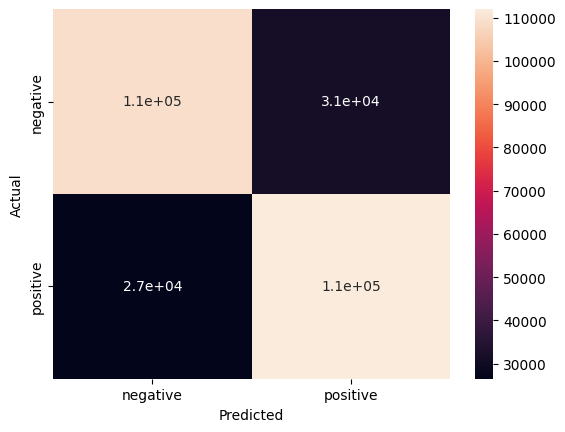

In [41]:
cm = pd.DataFrame(confusion_matrix(y_lin_val, y_lin_pred), index=SENTIMENT_MAP.values(), columns=SENTIMENT_MAP.values())
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
accuracy_score(y_lin_val, y_lin_pred)

0.7929898636539592

In [43]:
# ranfor = RandomForestClassifier(n_estimators=450, random_state=3407)

# ranfor.fit(X_lin_train, y_lin_train)

In [44]:
xgb = XGBClassifier()

xgb.fit(X_lin_train, y_lin_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_lin_pred = xgb.predict(X_lin_val)

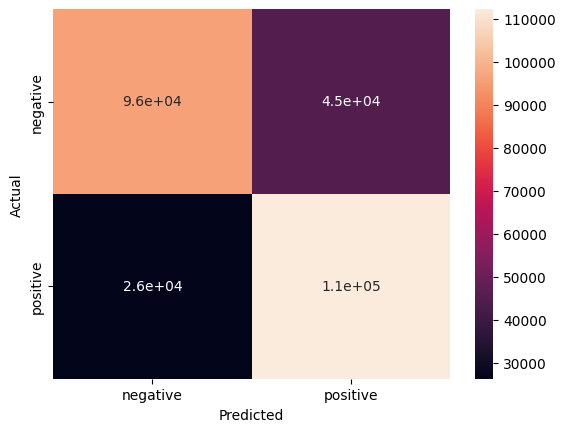

In [46]:
cm = pd.DataFrame(confusion_matrix(y_lin_val, y_lin_pred), index=SENTIMENT_MAP.values(), columns=SENTIMENT_MAP.values())
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
accuracy_score(y_lin_val, y_lin_pred)

0.7462544265867611

## Linear Model

In [48]:
import torch
from torch.utils.data import Dataset, DataLoader

In [49]:
np.random.seed(3407)
torch.manual_seed(3407)
torch_device_seed(3407)

In [59]:
from collections import Counter

In [60]:
selected_column = "Clean_Text"

In [61]:
# from clean text column, convert to vocab id
counts = Counter()
for row in df[selected_column]:
    counts.update(row)

# deleting infrequent words
MIN_COUNT = 2

print("num_words before:",len(counts.keys()))
for word in list(counts):
    if counts[word] < MIN_COUNT:
        del counts[word]
print("num_words after:",len(counts.keys()))

num_words before: 910713
num_words after: 263350


In [62]:
vocab2index = {"": 0, "UNK": 1}
words = ["", "UNK"]
for word in counts:
    vocab2index[word] = len(words)
    words.append(word)

# save the vocab2index to be used separately
import json
with open("./models/vocab2index.json", 'w') as f:
    json.dump(vocab2index, f, indent=4)

In [63]:
def encode_sentence(text, vocab2index, max_len=128):
    encoded = np.zeros(max_len, dtype=int)
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in text])
    length = min(max_len, len(enc1)) # if above max len, cut the rest
    encoded[:length] = enc1[:length]

    return encoded

In [64]:
df["Clean_Text"].apply(len).describe()

count    1.394976e+06
mean     9.389528e+00
std      4.063388e+00
min      4.000000e+00
25%      6.000000e+00
50%      9.000000e+00
75%      1.200000e+01
max      6.800000e+01
Name: Clean_Text, dtype: float64

In [65]:
MAX_ENCODED_LEN = 20

In [66]:
df["Clean_Text_Encoded"] = df["Clean_Text"].progress_apply(lambda x: np.array(encode_sentence(x, vocab2index, max_len=MAX_ENCODED_LEN)))
df.head()

  0%|          | 0/1394976 [00:00<?, ?it/s]

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_36165/3975550589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text_Encoded"] = df["Clean_Text"].progress_apply(lambda x: np.array(encode_sentence(x, vocab2index, max_len=MAX_ENCODED_LEN)))


,Sentiment,SentimentText,Clean_Text,Clean_Text_detok,Clean_Text_Encoded
1,0,I missed the New Moon trail...,"[I, missed, New, Moon, trailer]",I missed New Moon trailer,"[2, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1,omg its already 7:30 :O,"[omg, already, 730, O]",omg already 730 O,"[7, 8, 9, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,"[Omgaga, Im, sooo, im, gunna, CRy, Ive, dentis...",Omgaga Im sooo im gunna CRy Ive dentist since ...,"[1, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20,..."
4,0,i think mi bf is cheating on me!!! ...,"[think, mi, bf, cheating, TT]",think mi bf cheating TT,"[26, 27, 28, 29, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
7,0,Sunny Again Work Tomorrow :-| ...,"[Sunny, Again, Work, Tomorrow, TV, Tonight]",Sunny Again Work Tomorrow TV Tonight,"[31, 32, 33, 34, 35, 36, 0, 0, 0, 0, 0, 0, 0, ..."


In [67]:
# X_train, X_val, y_train, y_val = train_test_split(df["Clean_Text_Encoded"], y, random_state=3407, test_size=0.2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(df["Clean_Text_Encoded"], y, random_state=3407, test_size=0.2, stratify=y)

In [68]:
class TextEmotionDataset(Dataset):
    def __init__(self, data, labels=None):
        self.texts = data.to_numpy() # the assumption is already vocab id
        self.labels = labels.to_list()

    
    def __len__(self):
        return len(self.texts)


    def __getitem__(self, index):
        text = self.texts[index]
        label = torch.tensor(self.labels[index], dtype=torch.float)
        return text, label

In [69]:
train_ds = TextEmotionDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)

val_ds = TextEmotionDataset(X_val, y_val)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False)

In [70]:
# vocab_size = len(counts.keys())
vocab_size = len(vocab2index)
vocab_size

263352

In [71]:
for x in val_loader:
    print(x[0].shape)
    break

torch.Size([16, 20])


In [104]:
class SimpleLinearModel(nn.Module):
    def __init__(self, vocab_size, input_size, output_size):
        super(SimpleLinearModel, self).__init__()

        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim=128)

        self.linear_size = input_size * 128
        self.linear1 = nn.Linear(self.linear_size, 128)
        self.linear2 = nn.Linear(128, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.linear3 = nn.Linear(64, output_size)


    def forward(self, inputs):
        # we assume the inputs already in embedding dimension
        output = self.embedding(inputs).view(-1, self.linear_size)
        output = F.relu(self.linear1(output))
        output = F.relu(self.linear2(output))
        output = self.dropout1(output)
        output = self.linear3(output)

        return output

In [105]:
linear_model = SimpleLinearModel(vocab_size=vocab_size, input_size=MAX_ENCODED_LEN, output_size=1).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001, weight_decay=1e-5)

In [111]:
EPOCHS = 8

In [107]:
def fit(model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS, float_input=False):
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []

    for epoch in range(epochs):  # Loop over the dataset multiple times
        running_loss = 0.0
        total = 0
        correct = 0
        model.train()
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            if float_input:
                inputs = inputs.float()
            labels = labels.to(device)

            optimizer.zero_grad()
    
            outputs = model(inputs)
            outputs = outputs.squeeze(-1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item() 

            predicted = torch.round(F.sigmoid(outputs))
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
        # get train loss and accuracy
        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
    
        # get test loss and accuracy
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            model.eval()
            for data in val_loader:
                inputs, labels = data
                inputs = inputs.to(device)
                if float_input:
                    inputs = inputs.float()
                labels = labels.to(device)

                outputs = model(inputs)
                outputs = outputs.squeeze(-1)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                predicted = torch.round(F.sigmoid(outputs))
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch}: train_loss: {train_loss:.4f}; train_accuracy: {train_accuracy:.4f}; val_loss: {val_loss:.4f}; val_accuracy: {val_accuracy:.4f}")

    return {
        "train_loss": train_losses,
        "train_accuracy": train_accuracies,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }

In [108]:
clear_device_cache()

In [109]:
linear_model_result = fit(linear_model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS, float_input=False)

Epoch 0: train_loss: 0.0313; train_accuracy: 0.7582; val_loss: 0.4741; val_accuracy: 0.7745
Epoch 1: train_loss: 0.0296; train_accuracy: 0.7765; val_loss: 0.4641; val_accuracy: 0.7797
Epoch 2: train_loss: 0.0291; train_accuracy: 0.7816; val_loss: 0.4589; val_accuracy: 0.7845


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(linear_model_result["train_accuracy"], label="train_accuracy")
plt.plot(linear_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(linear_model_result["train_loss"], label="train_loss")
plt.plot(linear_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
PATH = f"models/torch_text_linear_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.pth"
print(PATH)

# save model
torch.save(linear_model.state_dict(), PATH)

# load model, UNCOMMENT this so no need to train again
# model = torch.load(PATH)

## Recurrent Model

In [121]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

In [152]:
rnn_model = Sequential()
rnn_model.add(layers.Input(shape=(MAX_ENCODED_LEN,)))
rnn_model.add(layers.Embedding(vocab_size, 128))
rnn_model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=False, dropout=0.1)))
rnn_model.add(layers.Dense(128, activation='relu'))
rnn_model.add(layers.Dropout(0.2))
rnn_model.add(layers.Dense(1, activation='sigmoid'))

In [153]:
rnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 20, 128)        │    33,709,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,824,513 (129.03 MB)

 Trainable params: 33,824,513 (129.03 MB)

 Non-trainable params: 0 (0.00 B)

In [154]:
rnn_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [150]:
X_tf_train = np.vstack(X_train.to_numpy())
X_tf_val = np.vstack(X_val.sample.to_numpy())

In [162]:
rnn_model_result = rnn_model.fit(
    x=X_tf_train,
    y=y_train,
    batch_size=64,
    epochs=EPOCHS,
    shuffle=True,
    validation_data=(X_tf_val, y_val)
)

Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 239s 8s/step - accuracy: 0.5288 - loss: 0.6912 - val_accuracy: 0.5963 - val_loss: 0.6717
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 245s 8s/step - accuracy: 0.7799 - loss: 0.5580 - val_accuracy: 0.6725 - val_loss: 0.6241


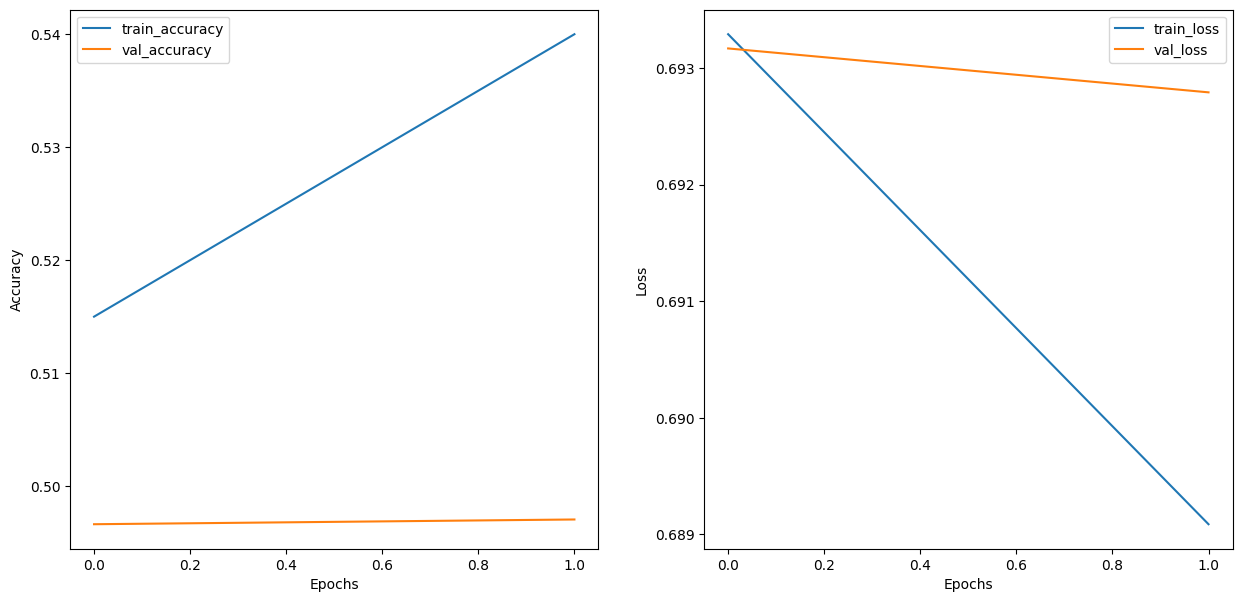

In [156]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(rnn_model_result.history["accuracy"], label="train_accuracy")
plt.plot(rnn_model_result.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_model_result.history["loss"], label="train_loss")
plt.plot(rnn_model_result.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [161]:
PATH = f"models/tensorflow_text_rnn_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.keras"
print(PATH)

# save model
# torch.save(rnn_model.state_dict(), PATH)
rnn_model.save(PATH)

models/tensorflow_text_rnn_model_2024.06.19.10.34.40.keras


## Convolutional Model

In [107]:
for x in train_loader:
    print(x[0].shape)
    break

torch.Size([16, 20])


In [108]:
class ConvolutionalModel(nn.Module):
    def __init__(self, vocab_size, output_size):
        super(ConvolutionalModel, self).__init__()

        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim=128, padding_idx=1)
        self.conv1 = nn.Conv1d(128, 64, 3)
        self.conv2 = nn.Conv1d(64, 32, 3)
        self.dropout1 = nn.Dropout(0.1)
        self.linear_size = 32 * 16
        self.linear1 = nn.Linear(self.linear_size, 64)
        self.dropout2 = nn.Dropout(0.1)
        self.linear2 = nn.Linear(64, output_size)

    
    def forward(self, input_text):
        embedded = self.embedding(input_text)
        # embedded = [batch size, seq len, embedding dim]
        # need to convert to:
        # embedded = [batch size, embedding dim, seq len]
        embedded = embedded.permute(0, 2, 1)
        output = F.relu(self.conv1(embedded))
        output = F.relu(self.conv2(output))
        output = self.dropout1(output).view(-1, self.linear_size)
        output = F.relu(self.linear1(output))
        output = self.dropout2(output)
        output = self.linear2(output) # no need softmax

        return output

In [109]:
cnn_model = ConvolutionalModel(vocab_size, output_size=1).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-5)

In [110]:
cnn_model_result = fit(cnn_model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS)

Epoch 0: train_loss: 0.0300; train_accuracy: 0.7703; val_loss: 0.4605; val_accuracy: 0.7849
Epoch 1: train_loss: 0.0285; train_accuracy: 0.7868; val_loss: 0.4477; val_accuracy: 0.7904
Epoch 2: train_loss: 0.0280; train_accuracy: 0.7912; val_loss: 0.4433; val_accuracy: 0.7921
Epoch 3: train_loss: 0.0277; train_accuracy: 0.7945; val_loss: 0.4401; val_accuracy: 0.7952
Epoch 4: train_loss: 0.0275; train_accuracy: 0.7959; val_loss: 0.4376; val_accuracy: 0.7959
Epoch 5: train_loss: 0.0273; train_accuracy: 0.7977; val_loss: 0.4369; val_accuracy: 0.7970
Epoch 6: train_loss: 0.0273; train_accuracy: 0.7986; val_loss: 0.4359; val_accuracy: 0.7972
Epoch 7: train_loss: 0.0272; train_accuracy: 0.7986; val_loss: 0.4359; val_accuracy: 0.7966
Epoch 8: train_loss: 0.0272; train_accuracy: 0.7988; val_loss: 0.4354; val_accuracy: 0.7982
Epoch 9: train_loss: 0.0272; train_accuracy: 0.7991; val_loss: 0.4374; val_accuracy: 0.7966
Epoch 10: train_loss: 0.0272; train_accuracy: 0.7992; val_loss: 0.4374; val_accu

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(cnn_model_result["train_accuracy"], label="train_accuracy")
plt.plot(cnn_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_model_result["train_loss"], label="train_loss")
plt.plot(cnn_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
PATH = f"models/torch_text_cnn_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.pth"
print(PATH)

# save model
torch.save(cnn_model.state_dict(), PATH)

## Transformer Model
This time using Keras

In [ ]:
import tensorflow as tf

# check gpu
tf.config.list_physical_devices('GPU')

In [ ]:
tf.__version__

In [ ]:
tf.random.set_seed(3407)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dropout1 = layers.Dropout(dropout_rate)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.ffn = Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.dropout2 = layers.Dropout(dropout_rate)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)


    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output) # add + norm
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = x.shape[-1]
        positions = np.arange(0, maxlen, step=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
# onehot y label
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()

In [ ]:
X_train = np.vstack(X_train.to_numpy())
X_train.shape

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
y_train_onehot = onehot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_train_onehot.shape

In [ ]:
X_val = np.vstack(X_val.to_numpy())
X_val.shape

In [ ]:
y_val = y_val.to_numpy()
y_val.shape

In [ ]:
y_val_onehot = onehot.transform(y_val.reshape(-1, 1)).toarray()
y_val_onehot.shape

In [ ]:
embed_dim = 64  # Embedding size for each token
num_heads = 8  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
max_len = 128

inputs = layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(8, activation="relu")(x)
outputs = layers.Dense(len(SENTIMENT_MAP), activation="softmax")(x)

transformer_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
transformer_model.summary()

In [ ]:
transformer_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=1e-05),
    # optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# if the loss doesn't decrease, early stop
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=2)

history = transformer_model.fit(
    X_train,
    y_train_onehot,
    batch_size=16,
    epochs=20,
    validation_data=(X_val, y_val_onehot),
    callbacks=[callback],
)

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
PATH = f"models/tensorflow_text_transformer_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.keras"
print(PATH)

# save model
transformer_model.save(PATH)

# Predict

In [ ]:
val_data_test = np.random.choice(y_val.index)
test_sample = df.loc[val_data_test]
test_sample

In [ ]:
def predict_torch(model, text, label=None):
    # use torch model
    # convert to vocab id
    print(text)
    text_encoded = encode_sentence(text, vocab2index)
    text_encoded = text_encoded.reshape(-1, text_encoded.shape[0])

    with torch.no_grad():
        model.eval()
        output = model(torch.tensor(text_encoded).to(device))
        _, predicted = torch.max(output.data, axis=1)

        predicted = predicted.cpu().numpy()

    print("Detected Emotion:", emotions_dict[predicted[0]])
    if label is not None:
        print("Actual Emotion  :", emotions_dict[label])

In [ ]:
predict_torch(linear_model, "I hate this country")

In [ ]:
predict_torch(linear_model, test_sample["Clean_Text_detok"], test_sample["Emotion_uniform"])

In [ ]:
predict_torch(rnn_model, "I hate this country")

In [ ]:
predict_torch(rnn_model, test_sample["Text"], test_sample["Emotion_uniform"])

In [ ]:
predict_torch(cnn_model, "I hate this country")

In [ ]:
predict_torch(cnn_model, test_sample["Text"], test_sample["Emotion_uniform"])

In [ ]:
def predict_tensorflow(model, text, label=None):
    print(text)
    text_encoded = encode_sentence(text, vocab2index)
    text_encoded = text_encoded.reshape(-1, text_encoded.shape[0])

    predicted = model.predict(text_encoded)
    predicted = tf.argmax(predicted, axis=1)

    print("Detected Emotion:", emotions_dict[predicted.numpy()[0]])
    if label is not None:
        print("Actual Emotion  :", emotions_dict[label])

In [ ]:
predict_tensorflow(transformer_model, "I hate this country")

In [ ]:
predict_tensorflow(transformer_model, test_sample["Text"], test_sample["Emotion_uniform"])

# Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def full_report(labs, pred):
    accuracy = accuracy_score(labs, pred)
    conf_mat = confusion_matrix(labs, pred)
    report = classification_report(labs, pred, target_names=emotions_dict.values())
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    cm = pd.DataFrame(conf_mat, index=emotions_dict.values(), columns=emotions_dict.values())
    sns.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
def pytorch_report(model, val_loader):
    pred = []
    labs = []
    with torch.no_grad():
        model.eval()
        for data in val_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, axis=1)
            labs.extend(labels.cpu().numpy())
            pred.extend(predicted.cpu().numpy())

    full_report(labs, pred)

In [ ]:
def tensorflow_report(model, X_val, y_val):
    pred = model.predict(X_val)
    pred = tf.argmax(pred, axis=1)

    full_report(y_val, pred)

In [ ]:
pytorch_report(linear_model, val_lin_loader)

In [ ]:
pytorch_report(rnn_model, val_loader)

In [ ]:
pytorch_report(cnn_model, val_loader)

In [ ]:
tensorflow_report(transformer_model, X_transformer_val, y_transformer_val)